# Task
Train a Random Forest Regressor model using the `heart_failure_clinical_records_dataset.csv` dataset, including data preprocessing steps like handling missing values, encoding, scaling, and splitting, and visualize the model's performance.

## Load Dataset

### Subtask:
Load the heart_failure_clinical_records_dataset.csv into a pandas DataFrame.


**Reasoning**:
To load the dataset and display its head, I will import pandas, read the CSV file, and then use the .head() method.



In [1]:
import pandas as pd

df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Preprocessing

### Subtask:
Perform necessary preprocessing steps such as handling missing values, encoding categorical features, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
I will check for missing values in the DataFrame `df` to understand the completeness of the dataset.



In [2]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Reasoning**:
Since there are no missing values, I will proceed to separate the features (X) from the target variable (y), which is 'DEATH_EVENT'.



In [3]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (299, 12)
Target (y) shape: (299,)


**Reasoning**:
Now that features (X) and target (y) are separated, I need to identify which columns are categorical and which are numerical to apply appropriate preprocessing steps like encoding and scaling.



In [4]:
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Numerical columns: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


**Reasoning**:
Now that categorical and numerical columns are identified, I will apply One-Hot Encoding to the categorical features to convert them into a numerical format suitable for machine learning models.



In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_categorical = encoder.fit_transform(X[categorical_cols])
encoded_col_names = encoder.get_feature_names_out(categorical_cols)
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, columns=encoded_col_names, index=X.index)

print("Shape of encoded categorical features:", X_encoded_categorical_df.shape)
print("First 5 rows of encoded categorical features:\n", X_encoded_categorical_df.head())

Shape of encoded categorical features: (299, 10)
First 5 rows of encoded categorical features:
    anaemia_0  anaemia_1  diabetes_0  diabetes_1  high_blood_pressure_0  \
0        1.0        0.0         1.0         0.0                    0.0   
1        1.0        0.0         1.0         0.0                    1.0   
2        1.0        0.0         1.0         0.0                    1.0   
3        0.0        1.0         1.0         0.0                    1.0   
4        0.0        1.0         0.0         1.0                    1.0   

   high_blood_pressure_1  sex_0  sex_1  smoking_0  smoking_1  
0                    1.0    0.0    1.0        1.0        0.0  
1                    0.0    0.0    1.0        1.0        0.0  
2                    0.0    0.0    1.0        0.0        1.0  
3                    0.0    0.0    1.0        1.0        0.0  
4                    0.0    1.0    0.0        1.0        0.0  


**Reasoning**:
Now that categorical features are encoded, I will scale the numerical features to standardize their range, which is crucial for many machine learning algorithms.



In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X[numerical_cols])
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_cols, index=X.index)

print("Shape of scaled numerical features:", X_scaled_numerical_df.shape)
print("First 5 rows of scaled numerical features:\n", X_scaled_numerical_df.head())

Shape of scaled numerical features: (299, 7)
First 5 rows of scaled numerical features:
         age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1 -0.491279                  7.514640          -0.007077  7.535660e-09   
2  0.350833                 -0.449939          -1.530560 -1.038073e+00   
3 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4  0.350833                 -0.435486          -1.530560  6.517986e-01   

   serum_creatinine  serum_sodium      time  
0          0.490057     -1.504036 -1.629502  
1         -0.284552     -0.141976 -1.603691  
2         -0.090900     -1.731046 -1.590785  
3          0.490057      0.085034 -1.590785  
4          1.264666     -4.682176 -1.577879  


**Reasoning**:
Now that both categorical and numerical features have been processed (encoded and scaled, respectively), I will combine them into a single DataFrame for the next steps in preprocessing.



In [7]:
X_processed = pd.concat([X_encoded_categorical_df, X_scaled_numerical_df], axis=1)

print("Shape of processed features (X_processed):", X_processed.shape)
print("First 5 rows of processed features:\n", X_processed.head())

Shape of processed features (X_processed): (299, 17)
First 5 rows of processed features:
    anaemia_0  anaemia_1  diabetes_0  diabetes_1  high_blood_pressure_0  \
0        1.0        0.0         1.0         0.0                    0.0   
1        1.0        0.0         1.0         0.0                    1.0   
2        1.0        0.0         1.0         0.0                    1.0   
3        0.0        1.0         1.0         0.0                    1.0   
4        0.0        1.0         0.0         1.0                    1.0   

   high_blood_pressure_1  sex_0  sex_1  smoking_0  smoking_1       age  \
0                    1.0    0.0    1.0        1.0        0.0  1.192945   
1                    0.0    0.0    1.0        1.0        0.0 -0.491279   
2                    0.0    0.0    1.0        0.0        1.0  0.350833   
3                    0.0    0.0    1.0        1.0        0.0 -0.912335   
4                    0.0    1.0    0.0        1.0        0.0  0.350833   

   creatinine_phosph

**Reasoning**:
With the features (`X_processed`) and the target variable (`y`) fully preprocessed, the next step is to split the data into training and testing sets to prepare for model training and evaluation, ensuring the model is tested on unseen data.



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (239, 17)
X_test shape: (60, 17)
y_train shape: (239,)
y_test shape: (60,)


## Apply Random Forest Regression

### Subtask:
Train a Random Forest Regressor model on the preprocessed training data.


**Reasoning**:
To train a Random Forest Regressor model, I will import the necessary class, instantiate it with a specified random state for reproducibility, and then fit the model to the training features (X_train) and target (y_train).



In [9]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Visualization

### Subtask:
Create visualizations to analyze the model's performance and insights from the data.


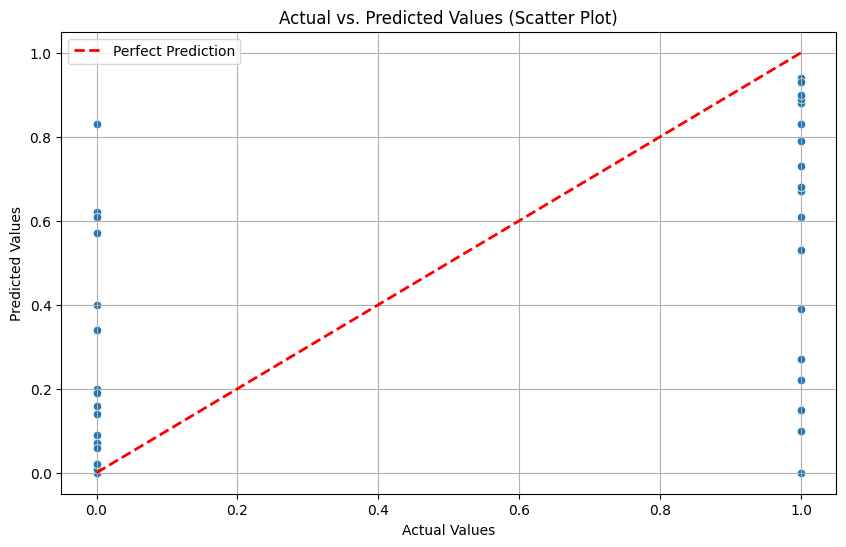

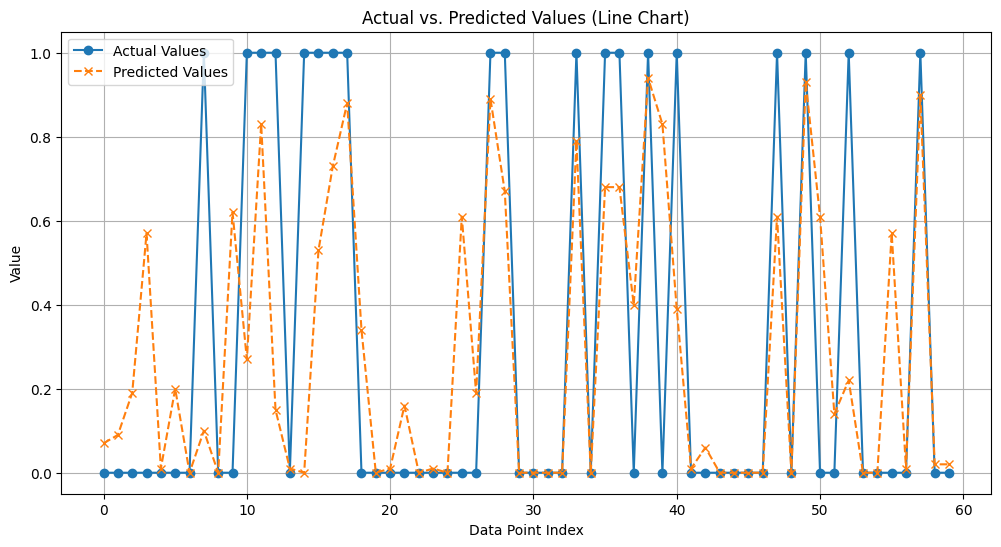

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize actual vs. predicted values with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Scatter Plot)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Visualize actual vs. predicted values with a line chart
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o', linestyle='-')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', marker='x', linestyle='--')
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values (Line Chart)")
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `heart_failure_clinical_records_dataset.csv` dataset, containing information such as `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, `ejection_fraction`, `high_blood_pressure`, `platelets`, `serum_creatinine`, `serum_sodium`, `sex`, `smoking`, `time`, and `DEATH_EVENT`, was successfully loaded into a pandas DataFrame.
*   No missing values were found in any columns of the dataset.
*   The `DEATH_EVENT` column was separated as the target variable ($y$), with the remaining 12 columns as features ($X$), resulting in shapes of ($299, 12$) for $X$ and ($299,$) for $y$.
*   Five categorical columns (`anaemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking`) were identified and One-Hot Encoded, expanding the feature set.
*   Seven numerical columns (`age`, `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, `serum_sodium`, `time`) were identified and scaled using `StandardScaler`.
*   After preprocessing, the combined feature set (`X_processed`) had a shape of ($299, 17$).
*   The data was split into training and testing sets with a $80/20$ ratio, resulting in `X_train` and `y_train` shapes of ($239, 17$) and ($239,$) respectively, and `X_test` and `y_test` shapes of ($60, 17$) and ($60,$) respectively, with stratification to maintain class distribution.
*   A Random Forest Regressor model was successfully trained on the preprocessed training data.

### Insights or Next Steps

*   The model has been trained and is ready for performance evaluation.
*   The next step should focus on evaluating the trained Random Forest Regressor model using appropriate metrics (e.g., R-squared, RMSE, MAE) and visualizing its performance, potentially including feature importances.


R-squared (R2): 0.3960
Mean Squared Error (MSE): 0.1307
Root Mean Squared Error (RMSE): 0.3615
Mean Absolute Error (MAE): 0.2260


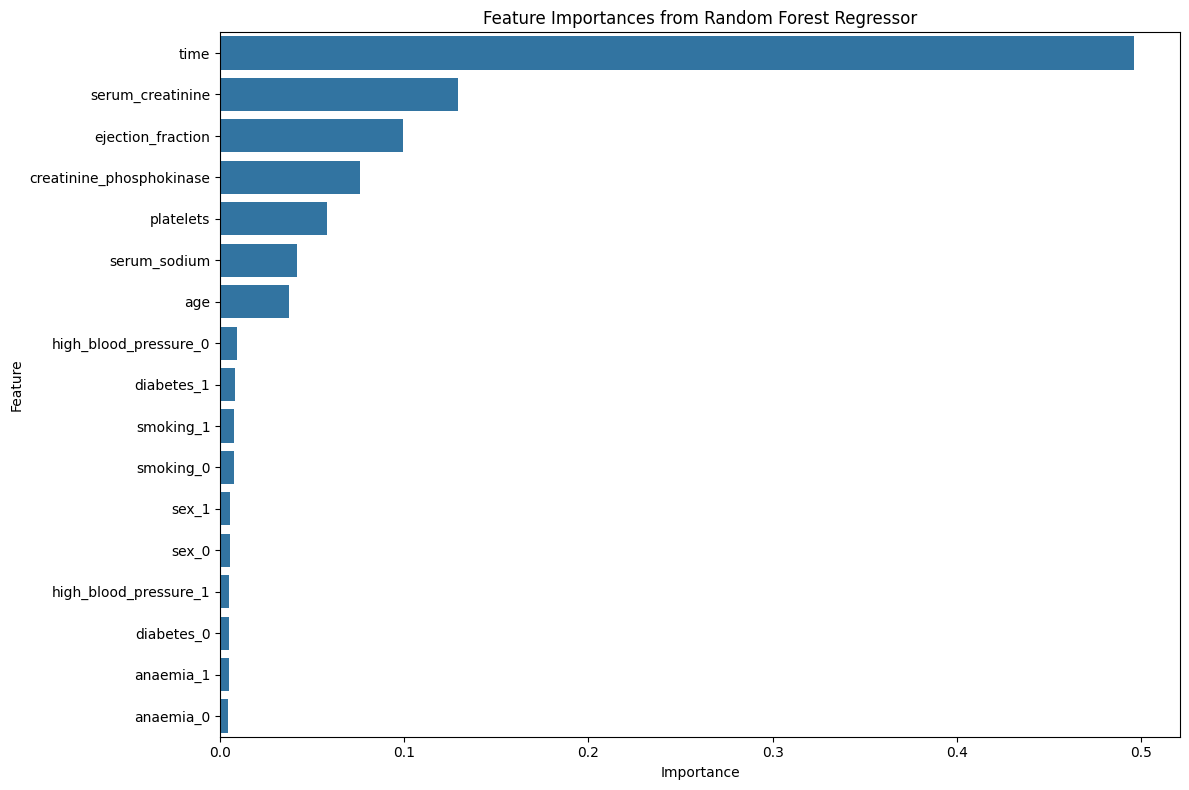

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize Feature Importances
feature_importances = model.feature_importances_
features = X_processed.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()